In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x_bp = pd.read_excel('X_bp.xlsx', index_col = 0)
x_nup = pd.read_excel('X_nup.xlsx', index_col = 0)
x_nup1=x_nup.tail(17)
df = x_nup.merge(x_bp, left_index = True, right_index = True, how = 'inner')
df = pd.concat([df,x_nup1],sort=False,axis=0)

In [3]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='median')
df=impute.fit_transform(df)
df = pd.DataFrame(data=df, columns=["Угол нашивки, град", "Шаг нашивки", "Плотность нашивки", "Соотношение матрица-наполнитель", "Плотность, кг/м3",
                                   "модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2 ",
                                    "Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа",
                                    "Потребление смолы, г/м2"])

In [4]:
X=df.drop(['Соотношение матрица-наполнитель'], axis=1)
y=df[['Соотношение матрица-наполнитель']]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=5)

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam, RMSprop

In [7]:
normalizer = tf.keras.layers.Normalization(axis = -1)

In [8]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Эпоха')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
m = {}
m_col = ['mean_squared_error', 'mean_absolute_error', 'r2_score', 'mean_absolute_percentage_error']
def me(y_test, y_pred, model_name):
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    m[model_name] = [mse, mae, r2, mape]
    print (mse, mae, r2, mape)

In [10]:
def result(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title(y_test.columns)
    plt.plot(np.array(y_test)[:100], label='Target')
    plt.plot(np.array(y_pred)[:100], label='Predict')
    plt.legend()

In [11]:
def nn_model1(normalizer):
    model1 = Sequential([
        normalizer,
        layers.Dense(10, activation = 'tanh'),
        layers.Dense(10, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model1.compile(loss='mean_squared_error', optimizer='Adam')
    return model1

In [12]:
model1=nn_model1(normalizer)

history = model1.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)

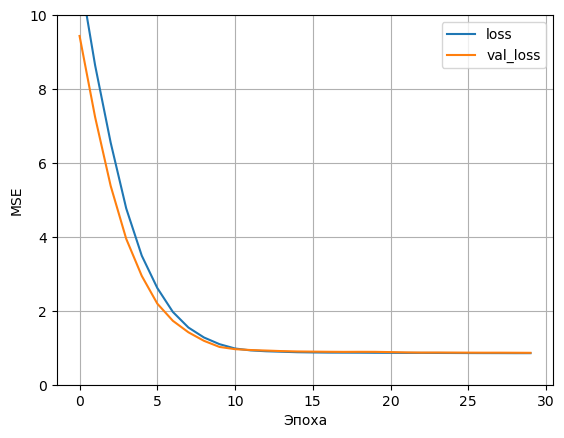

In [13]:
plot_loss(history)
plt.show()

In [14]:
y_pred1 = model1.predict(X_test)

10/10 [==============================] - 3s 331ms/step


In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 276
Trainable params: 251
Non-trainable params: 25
_________________________________________________________________


0.8773191084730646 0.7489936237336425 -0.07570013641413054 0.3205751695644045


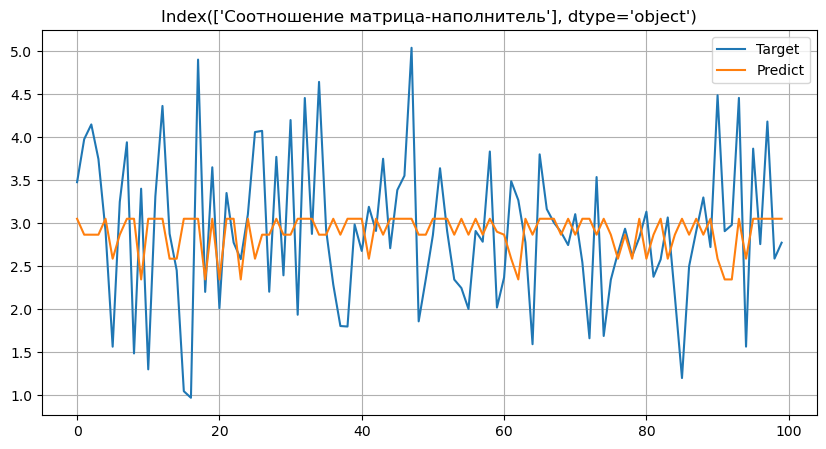

In [16]:
me(y_test, y_pred1, 'model1')
result(y_test, y_pred1)

изменим число нейронов в скрытых слоях

In [17]:
def nn_model2(normalizer):
    model2 = Sequential([
        normalizer,
        layers.Dense(64, activation = 'tanh'),
        layers.Dense(64, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model2.compile(loss='mean_squared_error', optimizer='Adam')
    return model2

In [18]:
model2 = nn_model2(normalizer)
history = model2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)

In [19]:
y_pred2 = model2.predict(X_test)

10/10 [==============================] - 0s 6ms/step


0.8382369353107643 0.7292548079423156 -0.02778062959383898 0.3150551763633649


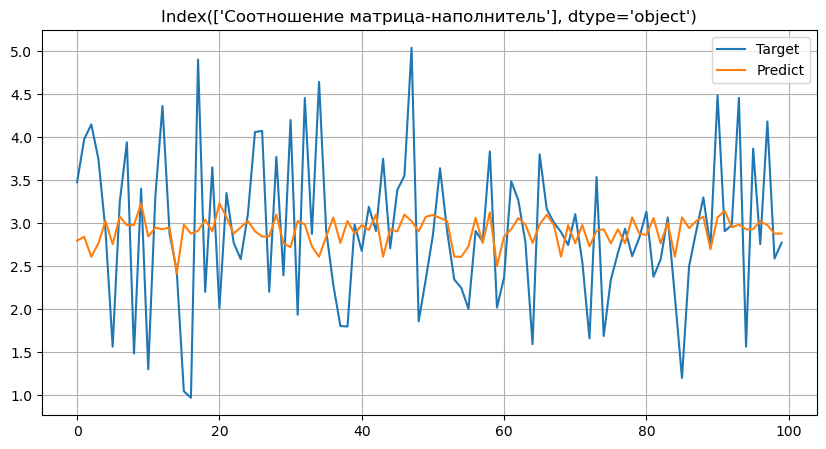

In [20]:
me(y_test, y_pred2, 'model2')
result(y_test, y_pred2)

In [21]:
def nn_model3(normalizer):
    model3 = Sequential([
        normalizer,
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model3.compile(loss='mean_squared_error', optimizer='Adam')
    return model3

In [22]:
model3 = nn_model3(normalizer)
history = model3.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)

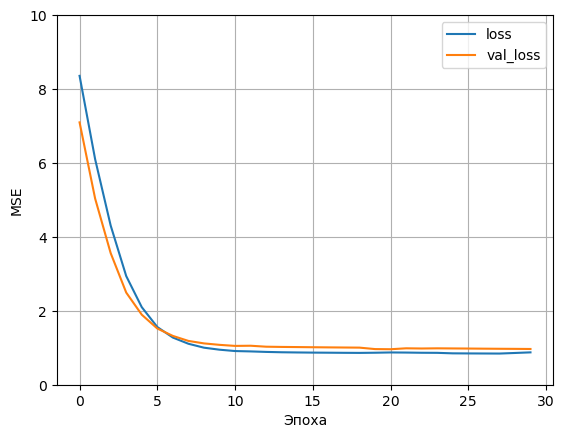

In [23]:
plot_loss(history)
plt.show()

10/10 [==============================] - 0s 3ms/step
0.9012324981817961 0.764497856599478 -0.10502086626415941 0.3212912273467203


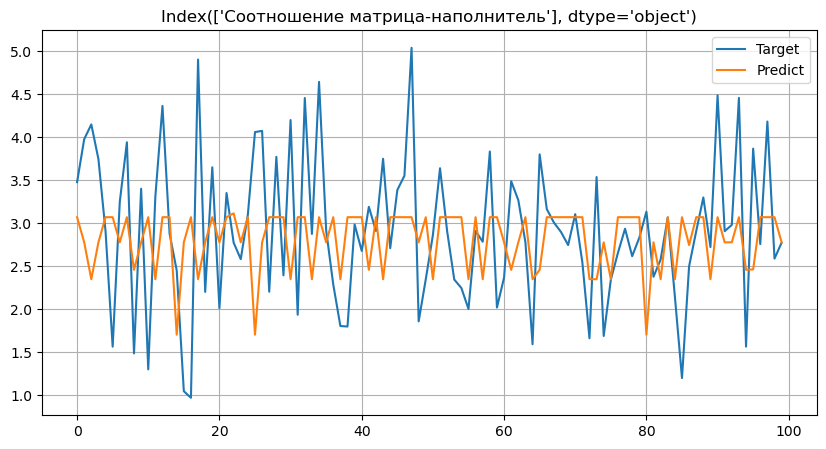

In [24]:
y_pred3 = model3.predict(X_test)
me(y_test, y_pred3, 'model3')
result(y_test, y_pred3)

Изменим функции активации

In [25]:
def nn_model4(normalizer):
    model4 = Sequential([
        normalizer,
        layers.Dense(8, activation = 'softmax'),
        layers.Dense(8, activation = 'softmax'),
        layers.Dense(1, activation = 'relu')
    ])
    
    model4.compile(loss='mean_squared_error', optimizer='Adam')
    return model4

10/10 [==============================] - 0s 2ms/step
2.6538635077734662 1.3945012998628374 -2.253960058279122 0.43716198003088563


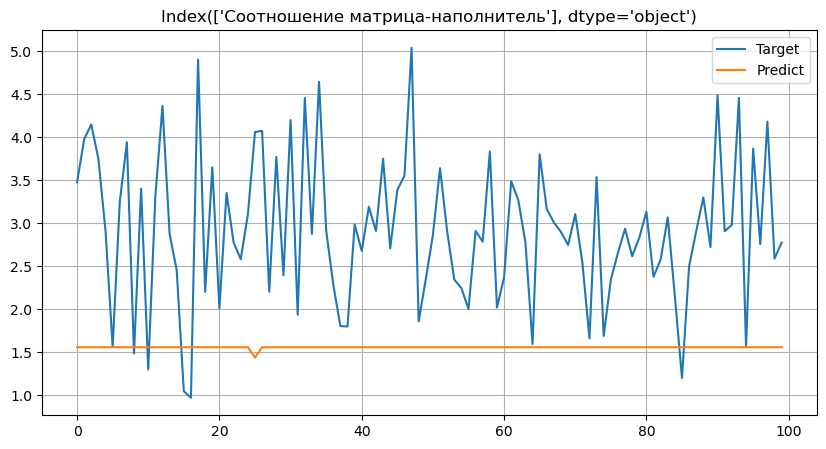

In [26]:
model4 = nn_model4(normalizer)
history = model4.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)
y_pred4 = model4.predict(X_test)
me(y_test, y_pred4, 'model4')
result(y_test, y_pred4)

In [27]:
def nn_model5(normalizer):
    model5 = Sequential([
        normalizer,
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(8, activation = 'softmax'),
        layers.Dense(1, activation = 'relu')
    ])
    
    model5.compile(loss='mean_squared_error', optimizer='Adam')
    return model5

10/10 [==============================] - 0s 2ms/step
9.28660315376422 2.9105022820435145 -10.386507124773026 1.0


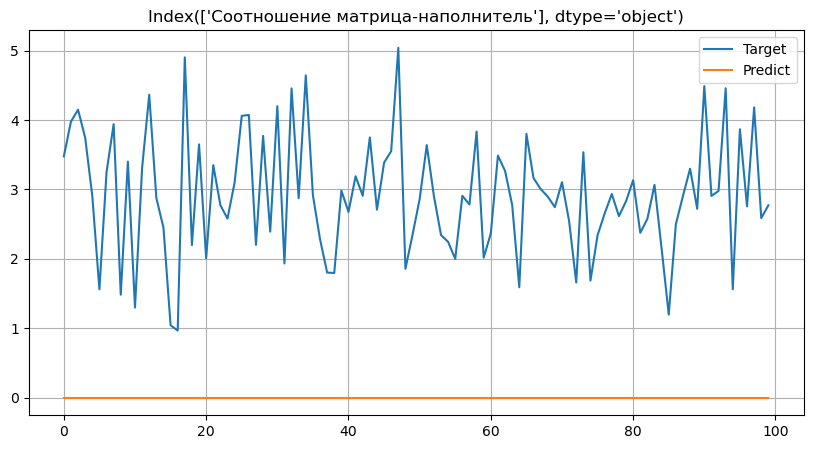

In [28]:
model5 = nn_model5(normalizer)
history = model5.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)
y_pred5 = model5.predict(X_test)
me(y_test, y_pred5, 'model5')
result(y_test, y_pred5)

добавим слой дропаут

In [29]:
def nn_model6(normalizer):
    model6 = Sequential([
        normalizer,
        layers.Dense(8, activation = 'tanh'),
        layers.Dropout(0.01),
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model6.compile(loss='mean_squared_error', optimizer='Adam')
    return model6

10/10 [==============================] - 0s 3ms/step
0.8878748162897155 0.7555783652300948 -0.08864272050771271 0.32029582484285485


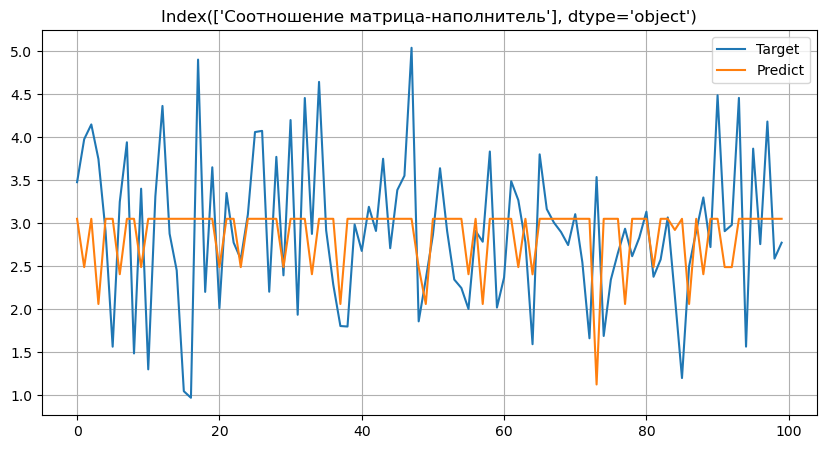

In [30]:
model6 = nn_model6(normalizer)
history = model6.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)
y_pred6 = model6.predict(X_test)
me(y_test, y_pred6, 'model6')
result(y_test, y_pred6)

In [31]:
def nn_model7(normalizer):
    model7 = Sequential([
        normalizer,
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(8, activation = 'tanh'),
        layers.Dropout(0.01),
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model7.compile(loss='mean_squared_error', optimizer='Adam')
    return model7

10/10 [==============================] - 0s 5ms/step
0.8605676314573841 0.7366114566214877 -0.05516078427090876 0.31895788318657003


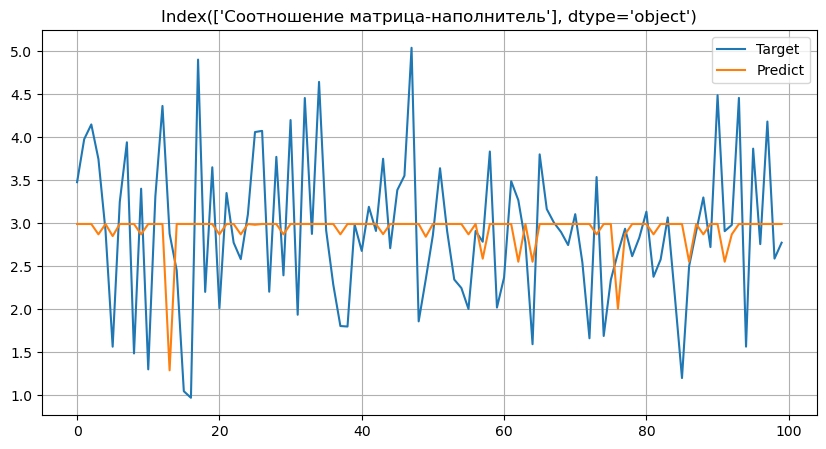

In [32]:
model7 = nn_model7(normalizer)
history = model7.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)
y_pred7 = model7.predict(X_test)
me(y_test, y_pred7, 'model7')
result(y_test, y_pred7)

изменим число эпох обучения

10/10 [==============================] - 0s 3ms/step
0.8229184879964759 0.7264355913866367 -0.008998346492412157 0.31514931450499273


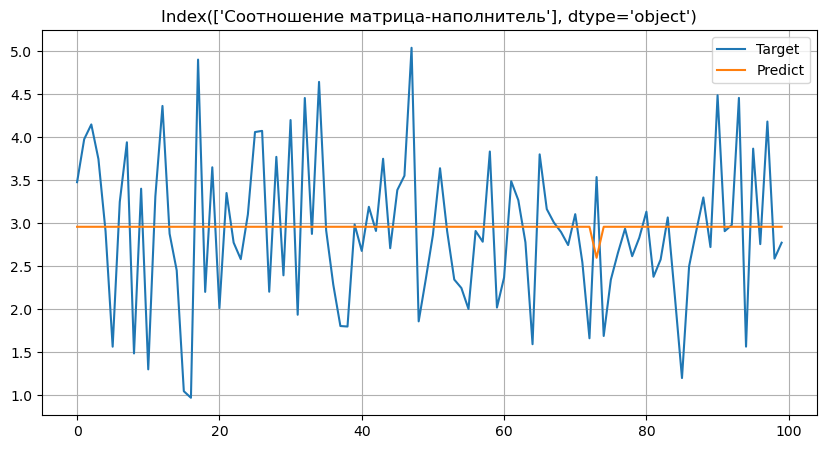

In [33]:
model8 = nn_model6(normalizer)
history = model8.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=120)
y_pred8 = model8.predict(X_test)
me(y_test, y_pred8, 'model8')
result(y_test, y_pred8)

In [34]:
def nn_model9(normalizer):
    model9 = Sequential([
        normalizer,
        layers.Dense(8, activation = 'tanh'),
        layers.Dropout(0.01),
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model9.compile(loss='mean_squared_error', optimizer='RMSprop')
    return model9

10/10 [==============================] - 0s 5ms/step
0.8152762122755317 0.7222956798473061 0.0003720148232578824 0.30811849197796337


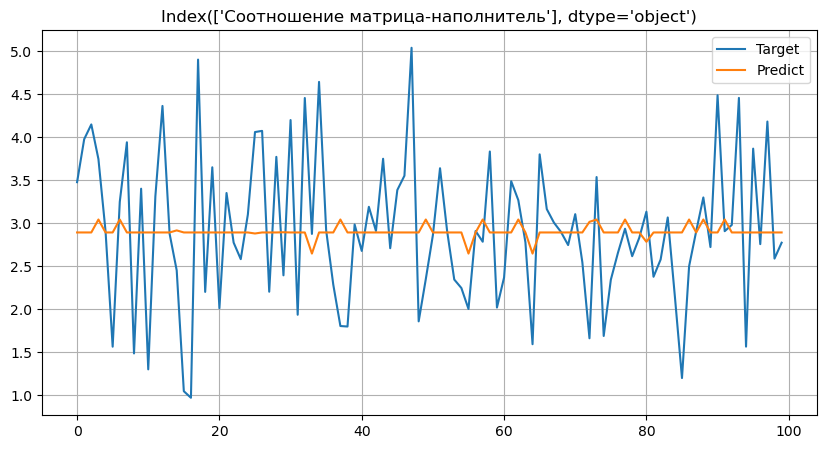

In [35]:
model9 = nn_model9(normalizer)
history = model9.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=120)
y_pred9 = model9.predict(X_test)
me(y_test, y_pred9, 'model9')
result(y_test, y_pred9)

In [36]:
def nn_model10():
    model10 = Sequential([
        layers.Dense(8, activation = 'tanh'),
        layers.Dropout(0.01),
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model10.compile(loss='mean_squared_error', optimizer='Adam')
    return model10

10/10 [==============================] - 0s 5ms/step
0.8220167438105244 0.7281467412032334 -0.00789269823458838 0.31722539913351183


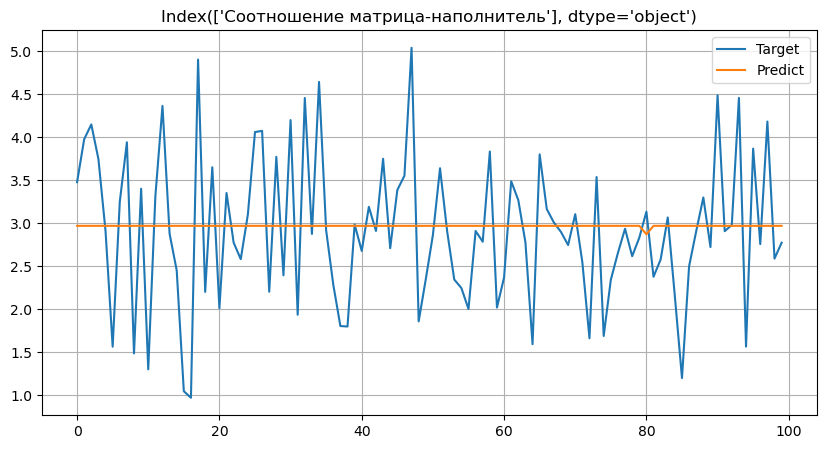

In [37]:
model10 = nn_model10()
history = model10.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=120)
y_pred10 = model10.predict(X_test)
me(y_test, y_pred10, 'model10')
result(y_test, y_pred10)

10/10 [==============================] - 0s 4ms/step
0.8878748162897155 0.7555783652300948 -0.08864272050771271 0.32029582484285485


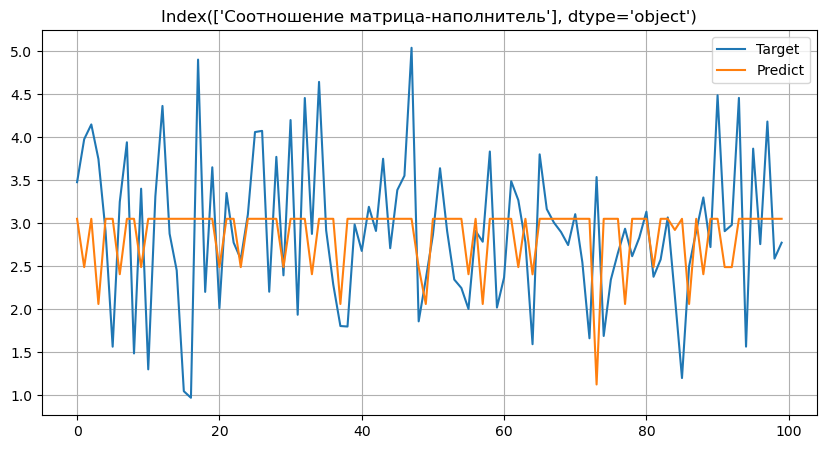

In [38]:
model11 = nn_model3(normalizer)
history = model11.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=120)
y_pred11 = model6.predict(X_test)
me(y_test, y_pred11, 'model11')
result(y_test, y_pred11)

In [39]:
df_metrics = pd.DataFrame(m, index=m_col).T.sort_values(by='r2_score')

In [40]:
df_metrics

,mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error
model5,9.286603,2.910502,-10.386507,1.000000
model4,2.653864,1.394501,-2.253960,0.437162
model3,0.901232,0.764498,-0.105021,0.321291
model6,0.887875,0.755578,-0.088643,0.320296
model11,0.887875,0.755578,-0.088643,0.320296
model1,0.877319,0.748994,-0.075700,0.320575
model7,0.860568,0.736611,-0.055161,0.318958
model2,0.838237,0.729255,-0.027781,0.315055
model8,0.822918,0.726436,-0.008998,0.315149
model10,0.822017,0.728147,-0.007893,0.317225
